Level 2

In [35]:
# Let's figure out which columns in the dataset have null values and how many
import pandas as pd

df = pd.read_csv('Dataset.csv')
nullCols = df.columns[df.isnull().any()]
for col in nullCols:
    print(col, df[col].isnull().sum())


famsize 50
Fedu 73
traveltime 73
higher 76
freetime 45
absences 69
G2 35
Feature_1 38
Feature_2 46
Feature_3 39


In [36]:
#luckily not many null cols.
#let's ordinalize the categorical columns fully. 

df['school'] = df['school'].map({'GP': 1, 'MS': 0})
df['sex'] = df['sex'].map({'F': 1, 'M': 0})
df['address'] = df['address'].map({'U': 1, 'R': 0})
df['famsize'] = df['famsize'].map({'LE3': 0, 'GT3': 1})
df['Pstatus'] = df['Pstatus'].map({'A': 0, 'T': 1})
df['guardian'] = df['guardian'].map({'mother': 2, 'father': 1, 'other': 0})

df['reason'] = df['reason'].map({'reputation': 3, 'course': 2, 'home': 1, 'other': 0})
df['schoolsup'] = df['schoolsup'].map({'yes': 1, 'no': 0})
df['famsup'] = df['famsup'].map({'yes': 1, 'no': 0})
df['paid'] = df['paid'].map({'yes': 1, 'no': 0})
df['activities'] = df['activities'].map({'yes': 1, 'no': 0})
df['nursery'] = df['nursery'].map({'yes': 1, 'no': 0})
df['higher'] = df['higher'].map({'yes': 1, 'no': 0})
df['internet'] = df['internet'].map({'yes': 1, 'no': 0})
df['romantic'] = df['romantic'].map({'yes': 1, 'no': 0})



In [37]:
# before ordinalizing job, ID patterns therein (roughly with edu and sex...)
grouped = df.groupby(['sex', 'Medu'])

for (sex, edu), group in grouped:
    jobCounts = group['Mjob'].value_counts()
    if not jobCounts.empty:
        mostJob = jobCounts.idxmax()
        leastJob = jobCounts.idxmin()
        print(f'sex: {sex}, Medu: {edu}, count: {len(group)}, mostJob: {mostJob}, leastJob: {leastJob}')
    else:
        print(f'sex: {sex}, Medu: {edu}, count: {len(group)}, mostJob: None, leastJob: None')


sex: 0, Medu: 0, count: 1, mostJob: other, leastJob: other
sex: 0, Medu: 1, count: 51, mostJob: other, leastJob: health
sex: 0, Medu: 2, count: 67, mostJob: other, leastJob: health
sex: 0, Medu: 3, count: 61, mostJob: services, leastJob: teacher
sex: 0, Medu: 4, count: 86, mostJob: teacher, leastJob: at_home
sex: 1, Medu: 0, count: 5, mostJob: at_home, leastJob: other
sex: 1, Medu: 1, count: 92, mostJob: at_home, leastJob: services
sex: 1, Medu: 2, count: 119, mostJob: other, leastJob: health
sex: 1, Medu: 3, count: 78, mostJob: other, leastJob: teacher
sex: 1, Medu: 4, count: 89, mostJob: teacher, leastJob: at_home


In [38]:
jobMap = {
    'teacher': 4,
    'services': 3,
    'health': 2,
    'other': 1,
    'at_home': 0
}
df['Mjob'] = df['Mjob'].map(jobMap)
df['Fjob'] = df['Fjob'].map(jobMap)

Level 3

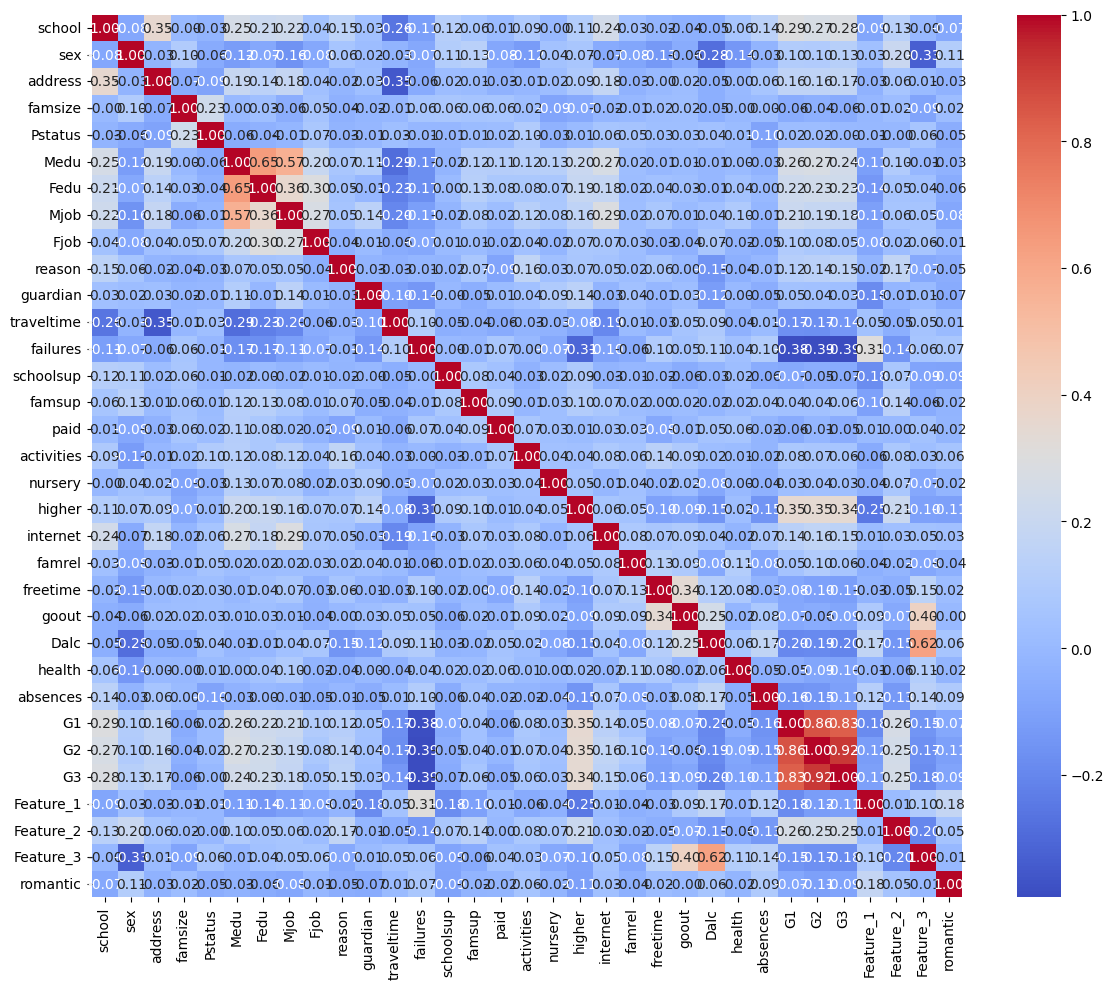

In [39]:
#basic correlations just

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.tight_layout()
plt.show()


In [40]:
# see most correlated pairs of columns
corrMatrix = df.corr()
printed = set()

for col1 in corrMatrix.columns:
    for col2 in corrMatrix.columns:
        if col1 != col2:
            pair = tuple(sorted([col1, col2]))
            if pair not in printed:
                val = corrMatrix.loc[col1, col2]
                if abs(val) > 0.15:
                    printed.add(pair)
printed = sorted(printed, key=lambda x: corrMatrix.loc[x[0], x[1]], reverse=True)
for col1, col2 in printed:
    val = corrMatrix.loc[col1, col2]
    print(f'{col1} and {col2} correlation: {val:.2f}')

G2 and G3 correlation: 0.92
G1 and G2 correlation: 0.86
G1 and G3 correlation: 0.83
Fedu and Medu correlation: 0.65
Dalc and Feature_3 correlation: 0.62
Medu and Mjob correlation: 0.57
Feature_3 and goout correlation: 0.40
Fedu and Mjob correlation: 0.36
address and school correlation: 0.35
G1 and higher correlation: 0.35
G2 and higher correlation: 0.35
G3 and higher correlation: 0.34
freetime and goout correlation: 0.34
Feature_1 and failures correlation: 0.31
Fedu and Fjob correlation: 0.30
G1 and school correlation: 0.29
Mjob and internet correlation: 0.29
G3 and school correlation: 0.28
Fjob and Mjob correlation: 0.27
G2 and Medu correlation: 0.27
G2 and school correlation: 0.27
Medu and internet correlation: 0.27
Feature_2 and G1 correlation: 0.26
G1 and Medu correlation: 0.26
Medu and school correlation: 0.25
Feature_2 and G3 correlation: 0.25
Feature_2 and G2 correlation: 0.25
Dalc and goout correlation: 0.25
internet and school correlation: 0.24
G3 and Medu correlation: 0.24
Fe

In [41]:
#write a function to get all other cols correlated with a given column
def getCorrCols(df, target, t=0.07):
    correlated = []
    for col in df.columns:
        if col != target:
            corr_value = df[target].corr(df[col])
            if abs(corr_value) > t:
                correlated.append((col, corr_value))
    return sorted(correlated, key=lambda x: abs(x[1]), reverse=True)

print(getCorrCols(df, 'Pstatus'))

[('famsize', np.float64(0.22737727448726056)), ('activities', np.float64(0.10155518831812062)), ('absences', np.float64(-0.09889048830831865)), ('address', np.float64(-0.09463539388729429)), ('Fjob', np.float64(0.07429028287480674))]


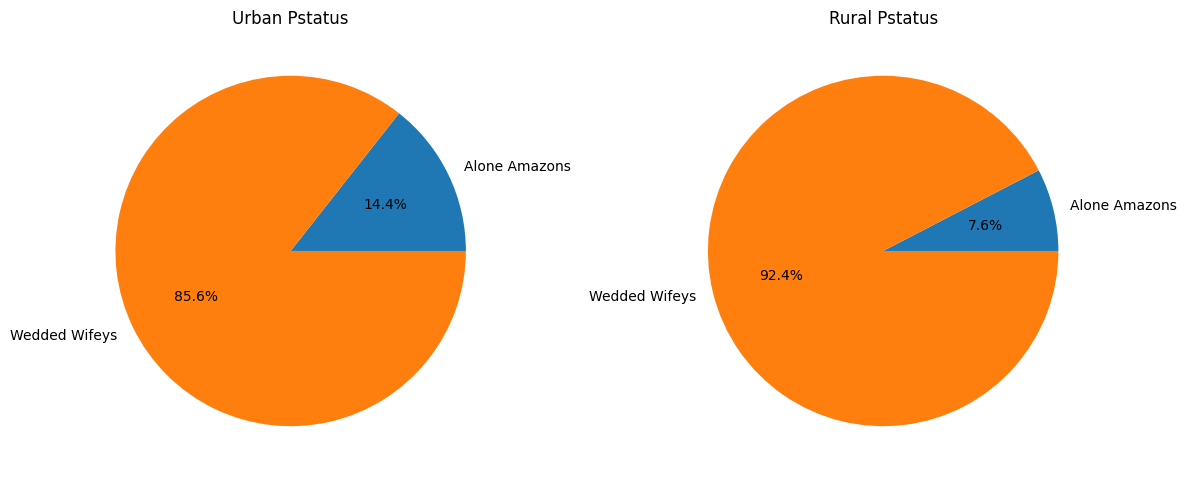

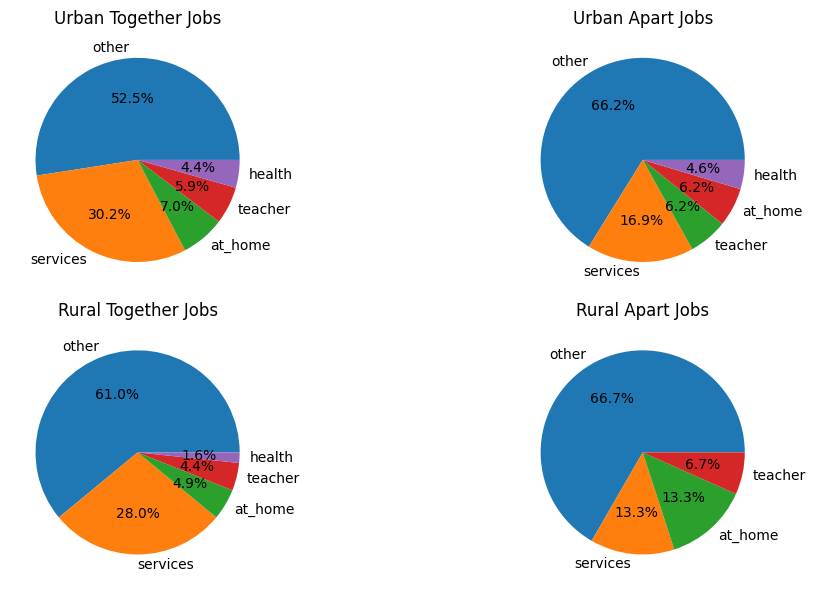

In [ ]:
#what influences/causes divorce?
revJobMap = {v: k for k, v in jobMap.items()}
urbanDf = df[df['address'] == 1]
ruralDf = df[df['address'] == 0]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
urbP = urbanDf['Pstatus'].value_counts().sort_index()
plt.pie(urbP, labels=['Alone Amazons', 'Wedded Wifeys'], autopct='%1.1f%%')
plt.title('Urban Pstatus')

plt.subplot(1, 2, 2)
rurP = ruralDf['Pstatus'].value_counts().sort_index()
plt.pie(rurP, labels=['Alone Amazons', 'Wedded Wifeys'], autopct='%1.1f%%')
plt.title('Rural Pstatus')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
urbWed = urbanDf[urbanDf['Pstatus'] == 1]['Fjob'].map(revJobMap).value_counts()
plt.pie(urbWed, labels=urbWed.index, autopct='%1.1f%%')
plt.title('Urban Together Jobs')

plt.subplot(2, 2, 2)
urbDiv = urbanDf[urbanDf['Pstatus'] == 0]['Fjob'].map(revJobMap).value_counts()
plt.pie(urbDiv, labels=urbDiv.index, autopct='%1.1f%%')
plt.title('Urban Apart Jobs')

plt.subplot(2, 2, 3)
rurWed = ruralDf[ruralDf['Pstatus'] == 1]['Fjob'].map(revJobMap).value_counts()
plt.pie(rurWed, labels=rurWed.index, autopct='%1.1f%%')
plt.title('Rural Together Jobs')

plt.subplot(2, 2, 4)
rurDiv = ruralDf[ruralDf['Pstatus'] == 0]['Fjob'].map(revJobMap).value_counts()
plt.pie(rurDiv, labels=rurDiv.index, autopct='%1.1f%%')
plt.title('Rural Apart Jobs')

plt.tight_layout()
plt.show()


# in rural areas, divorce is like half as common as in urban areas
# however contrary to misogyny ig, being at home
# doesnt decrease divorce rates: slight decrease in urban
# but if you're rural and at home, you're more likely to be divorce
# services seems to stablizine families by a lot in both urban and rural equally
# other jobs offer little change

Level 2

In [43]:
# we filled in nulls in the dataset using linear regression based on correlated
#cols over 0.15

from sklearn.linear_model import LinearRegression

def fillNulls(df, nullCols):
    corrMatrix = df.corr()
    noNullCols = [col for col in df.columns if col not in nullCols]

    for target in nullCols:
        corrCols = corrMatrix[target][noNullCols]
        corrCols = corrCols[abs(corrCols) >= 0.15].index.tolist()
        corrCols = [col for col in corrCols if df[col].isnull().sum() == 0]
        if not corrCols:
            continue

        train = df[df[target].notnull()]
        test = df[df[target].isnull()]
        if test.empty:
            continue

        XTrain = train[corrCols]
        YTrain = train[target]

        if XTrain.empty or len(XTrain) < 5:
            continue

        model = LinearRegression().fit(XTrain, YTrain)
        XTest = test[corrCols]
        if XTest.isnull().any().any():
            continue

        pred = model.predict(XTest)
        df.loc[df[target].isnull(), target] = pred

nullCols = ['famsize', 'Fedu', 'traveltime', 'higher', 'freetime', 
            'absences', 'G2', 'Feature_1', 'Feature_2', 'Feature_3']
fillNulls(df, nullCols)
df = df.round(0).astype('Int64') 

In [44]:
#just checking again for nulls just incase lol

nullCols = df.columns[df.isnull().any()]
for col in nullCols:
    print(col, df[col].isnull().sum())
    
corrMatrix = df.corr()

Level 1

In [45]:

for target in ['Feature_1', 'Feature_2', 'Feature_3']:
    print(f'\n{target} correlation:')
    corr = corrMatrix[target].drop(target)
    strongCorr = corr[abs(corr) > 0.15].sort_values(key=lambda x:abs(x), ascending=False)
    for col, val in strongCorr.items():
        print(f'{col}: {val:.3f}')
    


Feature_1 correlation:
failures: 0.323
higher: -0.251
romantic: 0.191
G1: -0.187
guardian: -0.187
schoolsup: -0.178
Dalc: 0.167

Feature_2 correlation:
G1: 0.265
G3: 0.253
G2: 0.251
sex: 0.205
Feature_3: -0.197
higher: 0.187
reason: 0.173

Feature_3 correlation:
Dalc: 0.634
goout: 0.395
sex: -0.330
Feature_2: -0.197
G3: -0.175
G2: -0.164
G1: -0.152


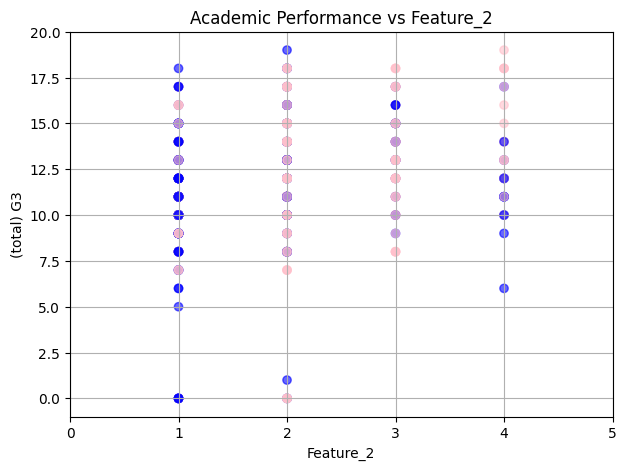

In [46]:
# basic visualizations
colors = df['sex'].map({0: 'blue', 1: 'pink'})

plt.figure(figsize=(7,5))
plt.scatter(df['Feature_2'], df['G3'], c=colors, alpha=0.6)
plt.xlabel('Feature_2')
plt.ylabel('(total) G3')
plt.title('Academic Performance vs Feature_2')
plt.xlim(df['Feature_2'].min() - 1, df['Feature_2'].max() + 1)
plt.ylim(df['G3'].min() - 1, df['G3'].max() + 1)
plt.grid(True)
plt.show()


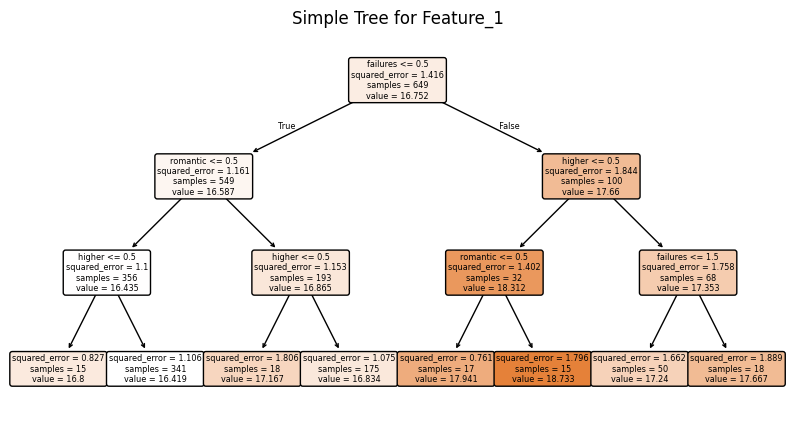

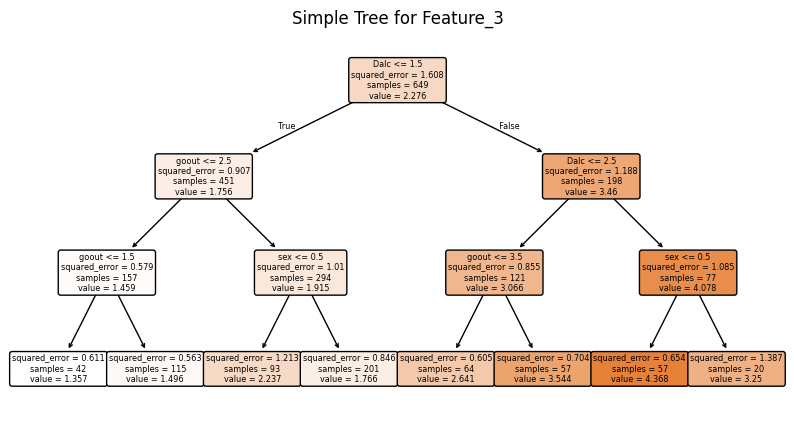

In [47]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

def tinyTree(df, target, topFeatures):
    dfTrain = df.dropna(subset=topFeatures + [target])
    X = dfTrain[topFeatures]
    y = dfTrain[target]
    model = DecisionTreeRegressor(max_depth=3, random_state=0)
    model.fit(X, y)

    plt.figure(figsize=(10, 5))
    plot_tree(model, feature_names=topFeatures, filled=True, rounded=True)
    plt.title(f'Simple Tree for {target}')
    plt.show()

feat1Cols = ['failures', 'higher', 'romantic']
feat3Cols = ['Dalc', 'goout', 'sex']

tinyTree(df, 'Feature_1', feat1Cols)
tinyTree(df, 'Feature_3', feat3Cols)

#lets see the decision tree taken by AI for features 1 and 3

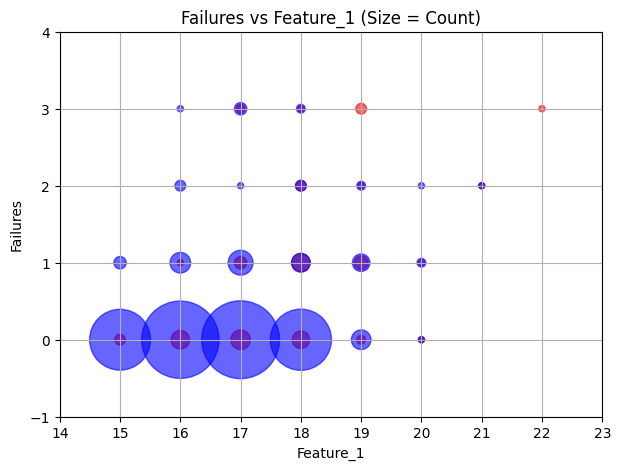

In [48]:
#feature 2 is correlated with grades, more grades raise average BUT also less 
#of feature 2 increases variability: studying less leaves your result upto luck or IQ
# but studying more ensures better grades.
# but note the big improvement 2->3 but not 1 2 or 3 4
# this is how studying works. plus feature 2 is higher for women 
#and decorred with feature 3 which sort of resembles a partying coefficient?
feat2 = 'studytime' 

#decorrelated with grades and studying, very much with weekday alcoholism
#and going out: same scale as weekday consumpt. also boys do it more
#so weekend alcoholism
feat3 = 'Walc'

grouped = df.groupby(['Feature_1', 'failures', 'higher']).size().reset_index(name='count')
grouped['color'] = grouped['higher'].map({0: 'red', 1: 'blue'})

plt.figure(figsize=(7, 5))
plt.scatter(
    grouped['Feature_1'],
    grouped['failures'],
    s=grouped['count'] * 20,  
    c=grouped['color'],
    alpha=0.6
)
plt.xlabel('Feature_1')
plt.ylabel('Failures')
plt.title('Failures vs Feature_1 (Size = Count)')
plt.xlim(df['Feature_1'].min() - 1, df['Feature_1'].max() + 1)
plt.ylim(df['failures'].min() - 1, df['failures'].max() + 1)
plt.grid(True)
plt.show()

#the values 16 to 22 r kinda giveaway, diff from all other fields. 
#note nearly the samishness BUT more failures if very high grad age
feat1 = 'highschoolGradAge'

df = df.rename(columns={'Feature_1': feat1, 'Feature_2': feat2, 'Feature_3': feat3})

Level 3

In [49]:
import numpy as np

def getCorrCols(df, target, t=0.07):
    correlated = []
    for col in df.columns:
        if col != target:
            corr_value = df[target].corr(df[col])
            if abs(corr_value) > t:
                correlated.append((col, corr_value))
    return sorted(correlated, key=lambda x: abs(x[1]), reverse=True)

print(getCorrCols(df, 'failures'))


[('G3', np.float64(-0.39331554804199215)), ('G1', np.float64(-0.38421047600441854)), ('G2', np.float64(-0.3817968815989553)), ('highschoolGradAge', np.float64(0.322671611625376)), ('higher', np.float64(-0.31671059494782067)), ('Fedu', np.float64(-0.179319270831053)), ('Medu', np.float64(-0.1722102872776206)), ('studytime', np.float64(-0.14331303729797934)), ('guardian', np.float64(-0.1385319682443423)), ('Mjob', np.float64(-0.11434328130009379)), ('school', np.float64(-0.11378817457251163)), ('traveltime', np.float64(0.11019630182199626)), ('absences', np.float64(0.10993439973658443)), ('Dalc', np.float64(0.10594909220788172)), ('freetime', np.float64(0.09993694719158723)), ('internet', np.float64(-0.09532977733772284)), ('sex', np.float64(-0.07388801154828784)), ('Fjob', np.float64(-0.07275477864067245)), ('Walc', np.float64(0.07027447687576127))]


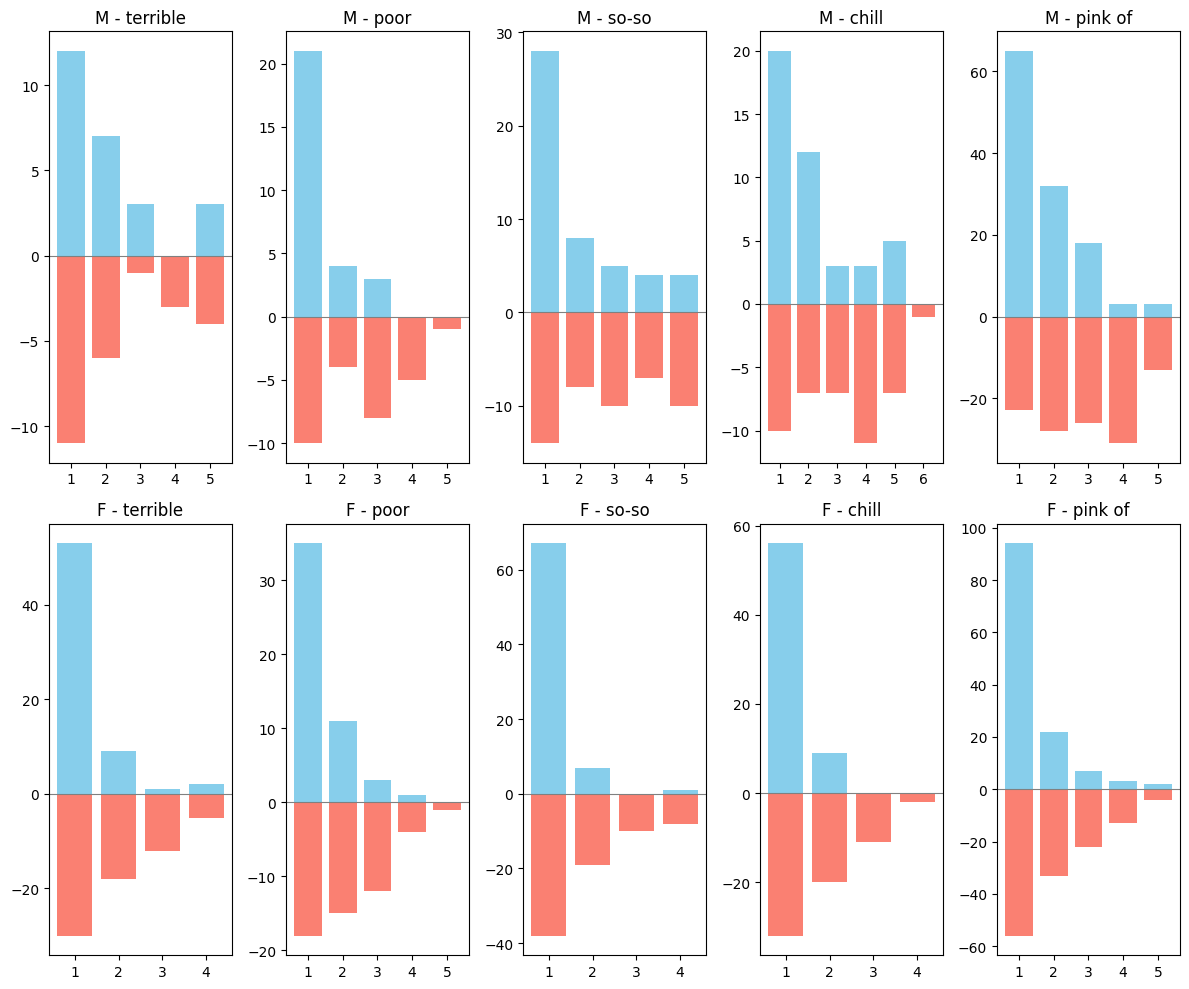

In [50]:
#what affects health?

labels = ['terrible', 'poor', 'so-so', 'chill', 'pink of']
plt.figure(figsize=(12,10))

for i, sex in enumerate([0,1]):
    sub = df[df['sex'] == sex]
    for h in range(1,6):
        plt.subplot(2,5,i*5+h)
        d = sub[sub['health']==h]['Dalc'].value_counts().sort_index()
        w = sub[sub['health']==h]['Walc'].value_counts().sort_index()
        x = sorted(set(d.index).union(w.index))
        y1 = [d.get(v,0) for v in x]
        y2 = [-w.get(v,0) for v in x]
        plt.bar(x, y1, color='skyblue')
        plt.bar(x, y2, color='salmon')
        plt.title(f"{['M','F'][sex]} - {labels[h-1]}")
        plt.xticks(x)
        plt.axhline(0, color='gray', lw=0.8)

plt.tight_layout()
plt.show()

    
# Males: in fact, you're WORSE off if you drink less on weekdays, 
# though on weekends it doesn't matter much
# Females: please drink more EVERY. DAY. it will improve your health
# also women are a little less healthy, spready evenly across all health levels
# but men have a bit more in the so-so and chill categories
#... ARE YOU SURE THE HEALTH COLUMN ISN'T REVERSED?????????

C:\Users\baidu\AppData\Local\Temp\ipykernel_8860\4269133940.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('RdYlGn', 5)


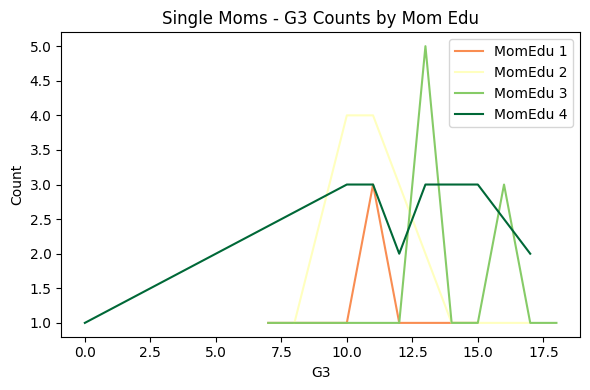

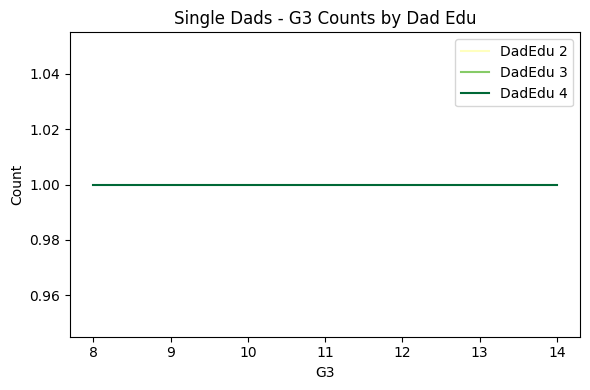

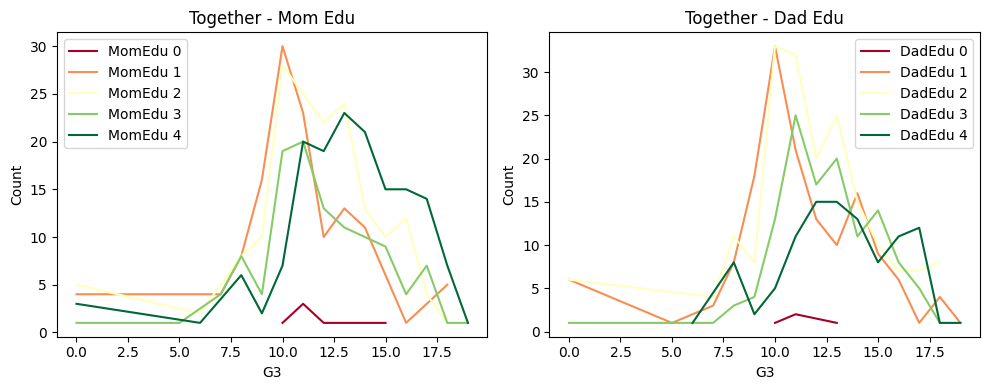

In [51]:
#how do parent education affect grades?

from matplotlib import cm

colors = cm.get_cmap('RdYlGn', 5)  

df1 = df[(df['Pstatus'] == 0) & (df['guardian'] == 2)]
plt.figure(figsize=(6,4))
for edu in sorted(df1['Medu'].unique()):
    sub = df1[df1['Medu'] == edu]
    counts = sub['G3'].value_counts().sort_index()
    plt.plot(counts.index, counts.values, label=f"MomEdu {edu}", color=colors(edu))
plt.title("Single Moms - G3 Counts by Mom Edu")
plt.xlabel("G3")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

df2 = df[(df['Pstatus'] == 0) & (df['guardian'] == 1)]
plt.figure(figsize=(6,4))
for edu in sorted(df2['Fedu'].unique()):
    sub = df2[df2['Fedu'] == edu]
    counts = sub['G3'].value_counts().sort_index()
    plt.plot(counts.index, counts.values, label=f"DadEdu {edu}", color=colors(edu))
plt.title("Single Dads - G3 Counts by Dad Edu")
plt.xlabel("G3")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

df3 = df[df['Pstatus'] == 1]
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
for edu in sorted(df3['Medu'].unique()):
    sub = df3[df3['Medu'] == edu]
    counts = sub['G3'].value_counts().sort_index()
    plt.plot(counts.index, counts.values, label=f"MomEdu {edu}", color=colors(edu))
plt.title("Together - Mom Edu")
plt.xlabel("G3")
plt.ylabel("Count")
plt.legend()

plt.subplot(1,2,2)
for edu in sorted(df3['Fedu'].unique()):
    sub = df3[df3['Fedu'] == edu]
    counts = sub['G3'].value_counts().sort_index()
    plt.plot(counts.index, counts.values, label=f"DadEdu {edu}", color=colors(edu))
plt.title("Together - Dad Edu")
plt.xlabel("G3")
plt.ylabel("Count")
plt.legend()

plt.tight_layout()
plt.show()

# the grades of single parents are slightly better:
# but thats because they are more likely to be educated
# for BOTH moms and dads in together families:
# edu level 0 has like 2 persons
# edu level 1 -> 2 significant grade improvement, but -> 3 brings no change
# edu level 3 -> 4 in moms brings drastic improvement to grades, lesser but 
# still significant for dads. for higher grades: educate moms / both parents

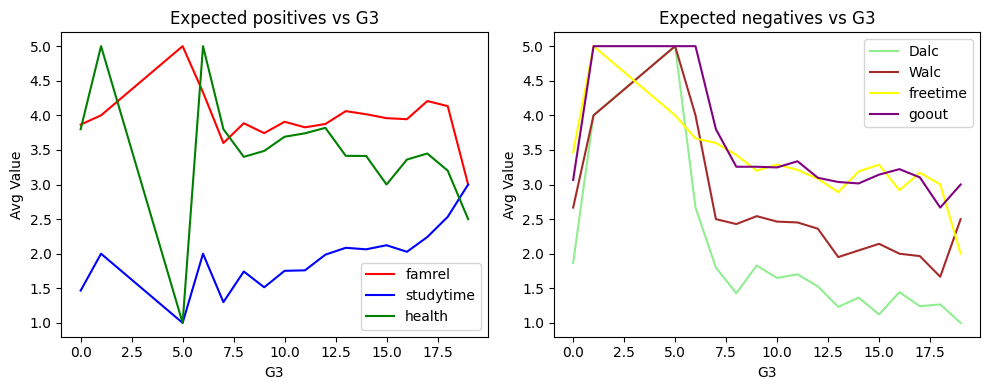

In [52]:
#how does lifestyle vary by grade level?

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(df.groupby('G3')['famrel'].mean(), label='famrel', color='red')
plt.plot(df.groupby('G3')['studytime'].mean(), label='studytime', color='blue')
plt.plot(df.groupby('G3')['health'].mean(), label='health', color='green')
plt.title("Expected positives vs G3")
plt.xlabel("G3")
plt.ylabel("Avg Value")
plt.legend()

plt.subplot(1,2,2)
plt.plot(df.groupby('G3')['Dalc'].mean(), label='Dalc', color='lightgreen')
plt.plot(df.groupby('G3')['Walc'].mean(), label='Walc', color='brown')
plt.plot(df.groupby('G3')['freetime'].mean(), label='freetime', color='yellow')
plt.plot(df.groupby('G3')['goout'].mean(), label='goout', color='purple')
plt.title("Expected negatives vs G3")
plt.xlabel("G3")
plt.ylabel("Avg Value")
plt.legend()

plt.tight_layout()
plt.show()

#Positive factors: higher grades have better study time,
# but little change in family relations with only small improvement
# and actually a bit worse health

# Negative factors: as expected, STEEP fall in all indulgences
# as grades cross 5-7.5 then more gradual fall, but still a fall.
# :(
# higher grades still tolerate freetime and going out but less on drinking
# and higher grades means you MUST give up weekday drinking and moderate
# on weekends pls

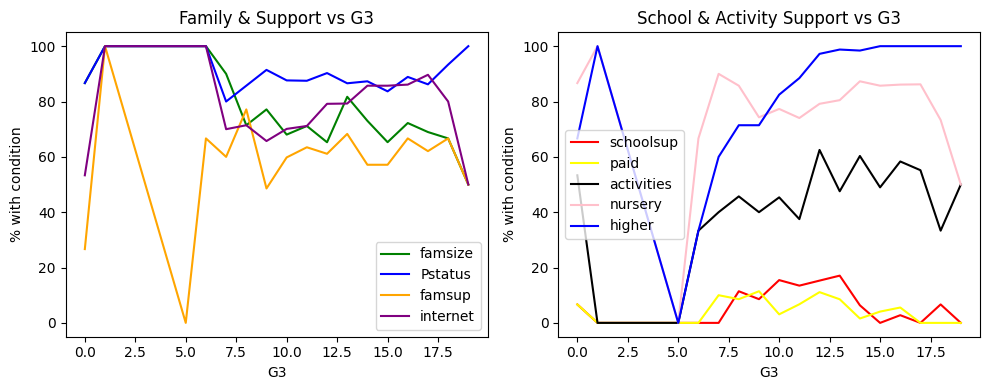

In [53]:
# how to family and edu support affect grades?

group1 = ['famsize', 'Pstatus', 'famsup', 'internet']
group2 = ['schoolsup', 'paid', 'activities', 'nursery', 'higher']
colors1 = ['green', 'blue', 'orange', 'purple']
colors2 = ['red', 'yellow', 'black', 'pink', 'blue']

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
for i, col in enumerate(group1):
    vals = df.groupby('G3')[col].apply(lambda x: (x == 1).mean()*100 if x.dtype != 'O' else (x == 'yes').mean()*100)
    plt.plot(vals.index, vals.values, label=col, color=colors1[i])
plt.title("Family & Support vs G3")
plt.xlabel("G3")
plt.ylabel("% with condition")
plt.legend()

plt.subplot(1,2,2)
for i, col in enumerate(group2):
    vals = df.groupby('G3')[col].apply(lambda x: (x == 1).mean()*100 if x.dtype != 'O' else (x == 'yes').mean()*100)
    plt.plot(vals.index, vals.values, label=col, color=colors2[i])
plt.title("School & Activity Support vs G3")
plt.xlabel("G3")
plt.ylabel("% with condition")
plt.legend()

plt.tight_layout()
plt.show()

# Family support:
# at very low grades, all large fams but doesnt matter beyond that
# Pstatus, famsum doesnt matter
# internet increases grades but then the VERY cream of the crop have less internet
# School support:
# schoolsup and paid are mostly pointless and uncommon in general
# extracurricular has no effect
# grades steadily increase higher edu aspirations: obvious
# also nursery is mostly same, except for the very top grades: less nursery ed-


Level 4

In [ ]:
corrMatrix = df.corr()

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
#here we keep on using new models, hoping this one will
# finally break the 60% accuracy barrier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def printMetrics(name, ytrue, index):
    ypred = [1 if preds[index][0][i] >= preds[index][1] else 0 for i in range(len(preds[index][0]))]
    print('Model:', name)
    print('accuracy:', accuracy_score(ytrue, ypred))
    print('precision:', precision_score(ytrue, ypred, average='weighted'))
    print('recall:', recall_score(ytrue, ypred, average='weighted'))
    print('f1:', f1_score(ytrue, ypred, average='weighted'))
    print()

def getBestThreshold(ytrue, ypred):
    p,r,t = precision_recall_curve(ytrue, ypred)
    
    f1s = 2 * p[:-1] * r[:-1] / (p[:-1] + r[:-1] + 1e-8)
    bi = f1s.argmax()
    return t[bi]

X = df.drop('romantic', axis=1)
y = df['romantic']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.23, random_state=42, stratify=y)
# lets test the ideal number of estimators
# for each tree model, and the ideal depth
beSc = {
    'randomForest': {'score': 0, 'n': 0},
    'xgboost': {'score': 0, 'n': 0},
    'catboost': {'score': 0, 'n': 0},
    'LightGBM': {'score': 0, 'n': 0},
    'logisticRegression': {'score': 0, 'n': 0}
}

for n in range (10, 110, 10):
    
    print(f'Testing with {n} estimators/iters...')
    rf = RandomForestClassifier(n_estimators=n, max_depth=4, class_weight='balanced', random_state=42)
    rf.fit(Xtrain, ytrain)
    rfPred = rf.predict_proba(Xtest)[:, 1]

    xgb = XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=n, use_label_encoder=False, eval_metric='mlogloss') 
    xgb.fit(Xtrain, ytrain)
    xgbPred = xgb.predict_proba(Xtest)[:, 1]

    lgb = LGBMClassifier(class_weight='balanced', max_depth=4, learning_rate=0.05, n_estimators=n, verbose=-1)
    lgb.fit(Xtrain, ytrain)
    lgbPred = lgb.predict_proba(Xtest)[:, 1]

    cat = CatBoostClassifier(iterations=n, depth=4, learning_rate=0.05, verbose=0)
    cat.fit(Xtrain, ytrain)
    catPred = cat.predict_proba(Xtest)[:, 1]

    log = LogisticRegression(max_iter=n, class_weight='balanced', random_state=31)
    log.fit(Xtrain, ytrain)
    logPred = log.predict_proba(Xtest)[:, 1]

    preds = [[rfPred, 0], [xgbPred, 0], [catPred, 0], [lgbPred, 0], [logPred, 0]]
    useOptimalThreshold = False

    if useOptimalThreshold:
        for i in range(len(preds)):
            preds[i][1] = getBestThreshold(ytest, preds[i][0])
    else:
        for i in range(len(preds)):
            preds[i][1] = 0.5

    modelNames = ['randomForest', 'xgboost', 'catboost', 'LightGBM', 'logisticRegression']
    for index, name in enumerate(modelNames):
        yPred = [1 if preds[index][0][i] >= preds[index][1] else 0 for i in range(len(preds[index][0]))]
        acc = accuracy_score(ytest, yPred)
        f1 = f1_score(ytest, yPred, average='weighted')
        # if acc > beSc[name]['score']:
        #     beSc[name] = {'score': acc, 'n': n}
        if f1 > beSc[name]['score']:
            beSc[name] = {'score': f1, 'n': n}
    
    # printMetrics('randomForest', ytest, 0)
    # printMetrics('xgboost', ytest, 1)
    # printMetrics('catboost', ytest, 2)
    # printMetrics("LightGBM", ytest, 3)
    # printMetrics("logisticRegression", ytest, 4)









Testing with 10 estimators/iters...
Testing with 20 estimators/iters...


c:\Users\baidu\BoardWare\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:40:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\baidu\BoardWare\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\baidu\BoardWare\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:40:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

Testing with 30 estimators/iters...
Testing with 40 estimators/iters...


c:\Users\baidu\BoardWare\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:40:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\baidu\BoardWare\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing with 50 estimators/iters...


c:\Users\baidu\BoardWare\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:40:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\baidu\BoardWare\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing with 60 estimators/iters...


c:\Users\baidu\BoardWare\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:40:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\baidu\BoardWare\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing with 70 estimators/iters...


c:\Users\baidu\BoardWare\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:40:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\baidu\BoardWare\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\baidu\BoardWare\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:40:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

Testing with 80 estimators/iters...


c:\Users\baidu\BoardWare\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\baidu\BoardWare\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:40:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Testing with 90 estimators/iters...


c:\Users\baidu\BoardWare\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\baidu\BoardWare\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:40:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Testing with 100 estimators/iters...


c:\Users\baidu\BoardWare\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(beSc)

{'randomForest': {'score': 0.6261029411764706, 'n': 20}, 'xgboost': {'score': 0.5940784919324777, 'n': 100}, 'catboost': {'score': 0.5907407407407408, 'n': 100}, 'LightGBM': {'score': 0.6027164685908318, 'n': 100}, 'logisticRegression': {'score': 0.6240997618046799, 'n': 90}}


In [56]:

#abandoned cell

probs = rf.predict_proba(Xtest)[:,1]
precision, recall, thresholds = precision_recall_curve(ytest, probs)

print('Precision-Recall Curve:')
for p, r, t in zip(precision, recall, thresholds):
    print(f'Precision: {p:.2f}, Recall: {r:.2f}, Threshold: {t:.2f}')

Precision-Recall Curve:
Precision: 0.37, Recall: 1.00, Threshold: 0.22
Precision: 0.36, Recall: 0.98, Threshold: 0.28
Precision: 0.36, Recall: 0.96, Threshold: 0.29
Precision: 0.36, Recall: 0.96, Threshold: 0.33
Precision: 0.36, Recall: 0.96, Threshold: 0.37
Precision: 0.37, Recall: 0.96, Threshold: 0.38
Precision: 0.37, Recall: 0.96, Threshold: 0.38
Precision: 0.37, Recall: 0.96, Threshold: 0.39
Precision: 0.37, Recall: 0.96, Threshold: 0.39
Precision: 0.38, Recall: 0.96, Threshold: 0.39
Precision: 0.38, Recall: 0.96, Threshold: 0.39
Precision: 0.38, Recall: 0.96, Threshold: 0.39
Precision: 0.38, Recall: 0.96, Threshold: 0.39
Precision: 0.39, Recall: 0.96, Threshold: 0.40
Precision: 0.39, Recall: 0.96, Threshold: 0.40
Precision: 0.39, Recall: 0.95, Threshold: 0.40
Precision: 0.38, Recall: 0.93, Threshold: 0.40
Precision: 0.38, Recall: 0.93, Threshold: 0.41
Precision: 0.39, Recall: 0.93, Threshold: 0.41
Precision: 0.38, Recall: 0.91, Threshold: 0.41
Precision: 0.38, Recall: 0.89, Thres

Level 5

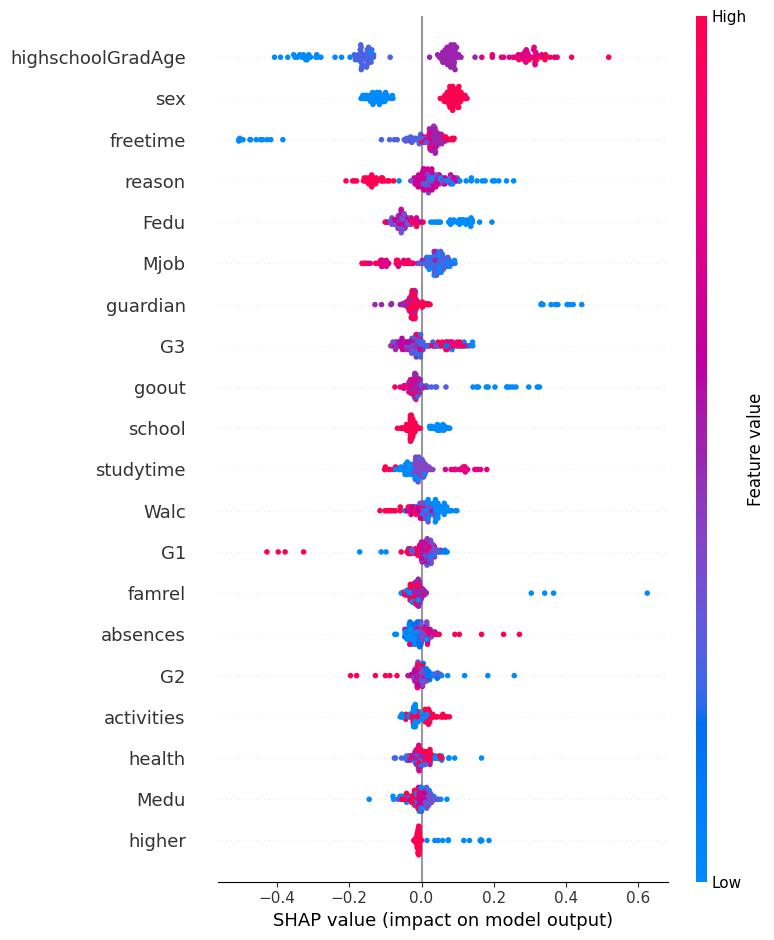

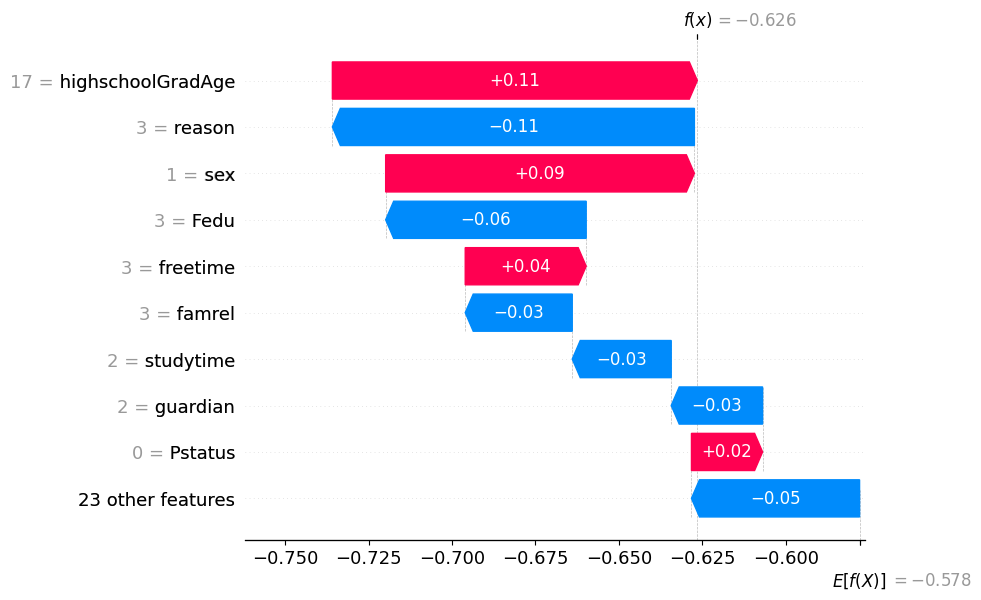

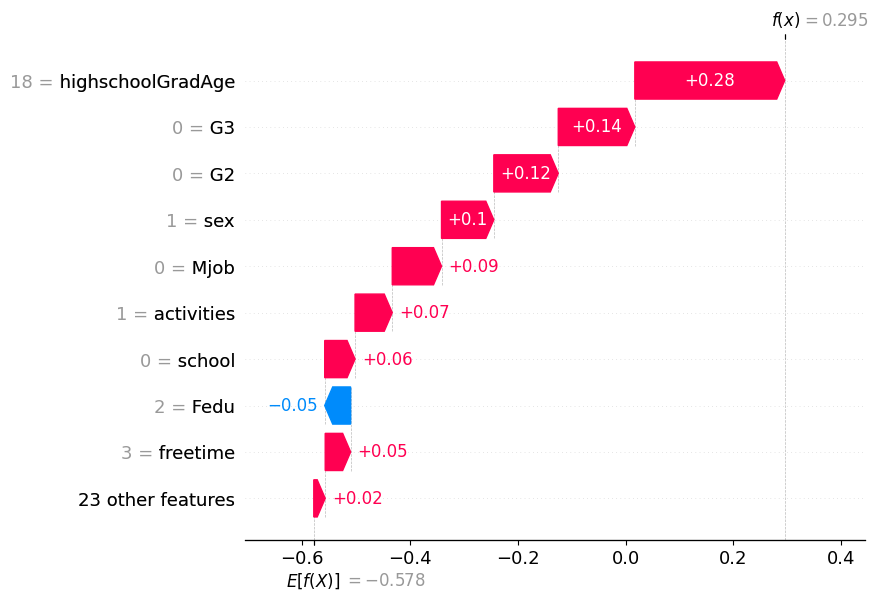

In [60]:
x2 = df.drop('romantic', axis=1).copy()
y2 = df['romantic'].copy()
x2train, x2test, y2train, y2test = train_test_split(x2, y2, test_size=0.23, stratify=y2, random_state=42)

catm = CatBoostClassifier(iterations=n, depth=4, learning_rate=0.05, verbose=0)
catm.fit(x2train, y2train)
catPred = catm.predict(x2test)

import shap

explainer = shap.TreeExplainer(catm)
shap_values = explainer.shap_values(x2test)
shap.summary_plot(shap_values, x2test, feature_names=x2.columns, plot_type="dot")
shap.plots.waterfall(shap.Explanation(values=shap_values[42], 
                                     base_values=explainer.expected_value, 
                                     data=x2test.iloc[42]))
shap.plots.waterfall(shap.Explanation(values=shap_values[37], 
                                     base_values=explainer.expected_value, 
                                     data=x2test.iloc[37]))

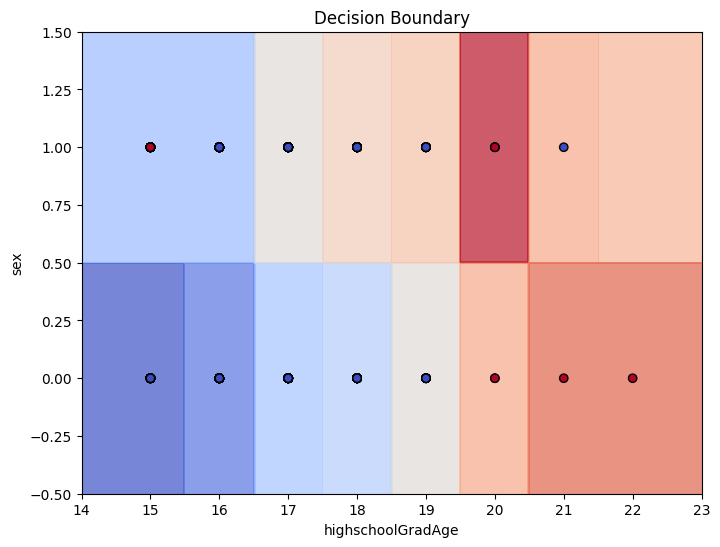

In [ ]:
X = df[['highschoolGradAge', 'sex']]
y = df['romantic']
catm = CatBoostClassifier(iterations=100, depth=4, learning_rate=0.05, verbose=0)
catm.fit(X, y)

xMin, xMax = X['highschoolGradAge'].min()-1, X['highschoolGradAge'].max()+1
yMin, yMax = X['sex'].min()-0.5, X['sex'].max()+0.5
xx, yy = np.meshgrid(np.linspace(xMin, xMax, 300),
                     np.linspace(yMin, yMax, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = catm.predict_proba(grid)[:, 1].reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, levels=25, cmap='coolwarm', alpha=0.7)
plt.scatter(X['highschoolGradAge'], X['sex'], c=y, cmap='coolwarm', edgecolor='k')
plt.xlabel('highschoolGradAge'); plt.ylabel('sex')
plt.title('Decision Boundary')
plt.show()

#so women start dating a bit more and earlier: tracks
#also women romantic peak at 20 but men at 21-22: wow
# stereotype ig. Also ig 21-22 women just get married...
#maybe idk